<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Hierarchical clustering lab
---

For this exercise we are using the US Arrest data which is one of the datasets provided by R, more information can be found [here]( https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html).
It contains data on the rate of arrests for murder, assault and rape per 100000 inhabitants and the percentage of urban population per US state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

#### 1. Load the dataset from the provided file

In [3]:
df = pd.read_csv('../USArrests.csv')
df = df.rename(columns={'Unnamed: 0': 'States'})

In [4]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


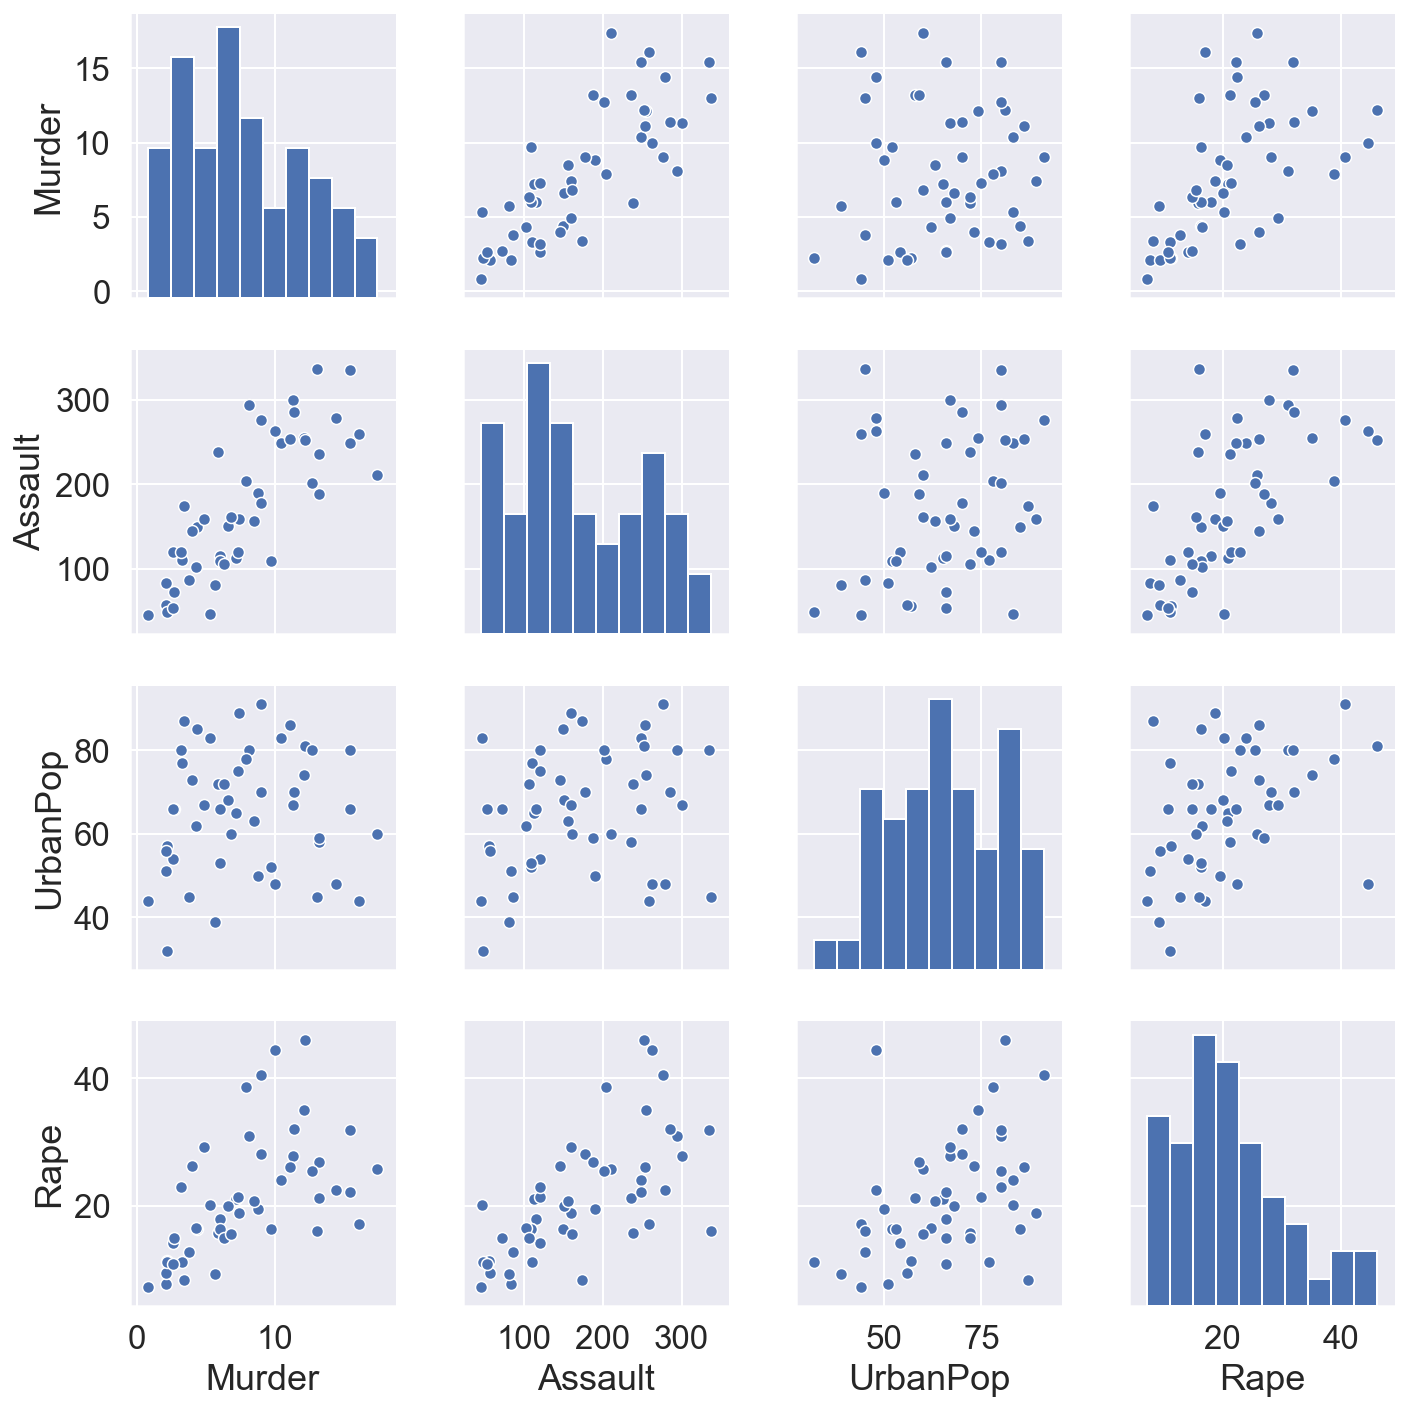

In [6]:
sns.pairplot(df)
plt.show()

#### 2. Standardize the data

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, 1:])
X[:5]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

#### 3. Obtain the principal components for the rescaled data of 2.

- Determine the eigenvectors and explained variance ratio
- Plot the principal components versus each other

In [8]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC{}'.format(
    i) for i in range(1, pca.n_components_+1)])
#df_pca['States'] = df.States

尝试使用AgglomerativeClustering模型

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X_pca)
labels = model.labels_

In [17]:
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([19, 19, 12]))

测试成功，agglomerative模型只给出结果，要看过程就要看linkage和Z

In [9]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [10]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [11]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


In [24]:
df_pca['States']=df["States"]

In [12]:
# how do the original basis vectors translated into the new coordinate system?
original_basis = pca.transform(np.eye(4))
original_basis

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [13]:
# the original basis vectors are represented by the
# respective components of the eigenvectors
pca.components_.T

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

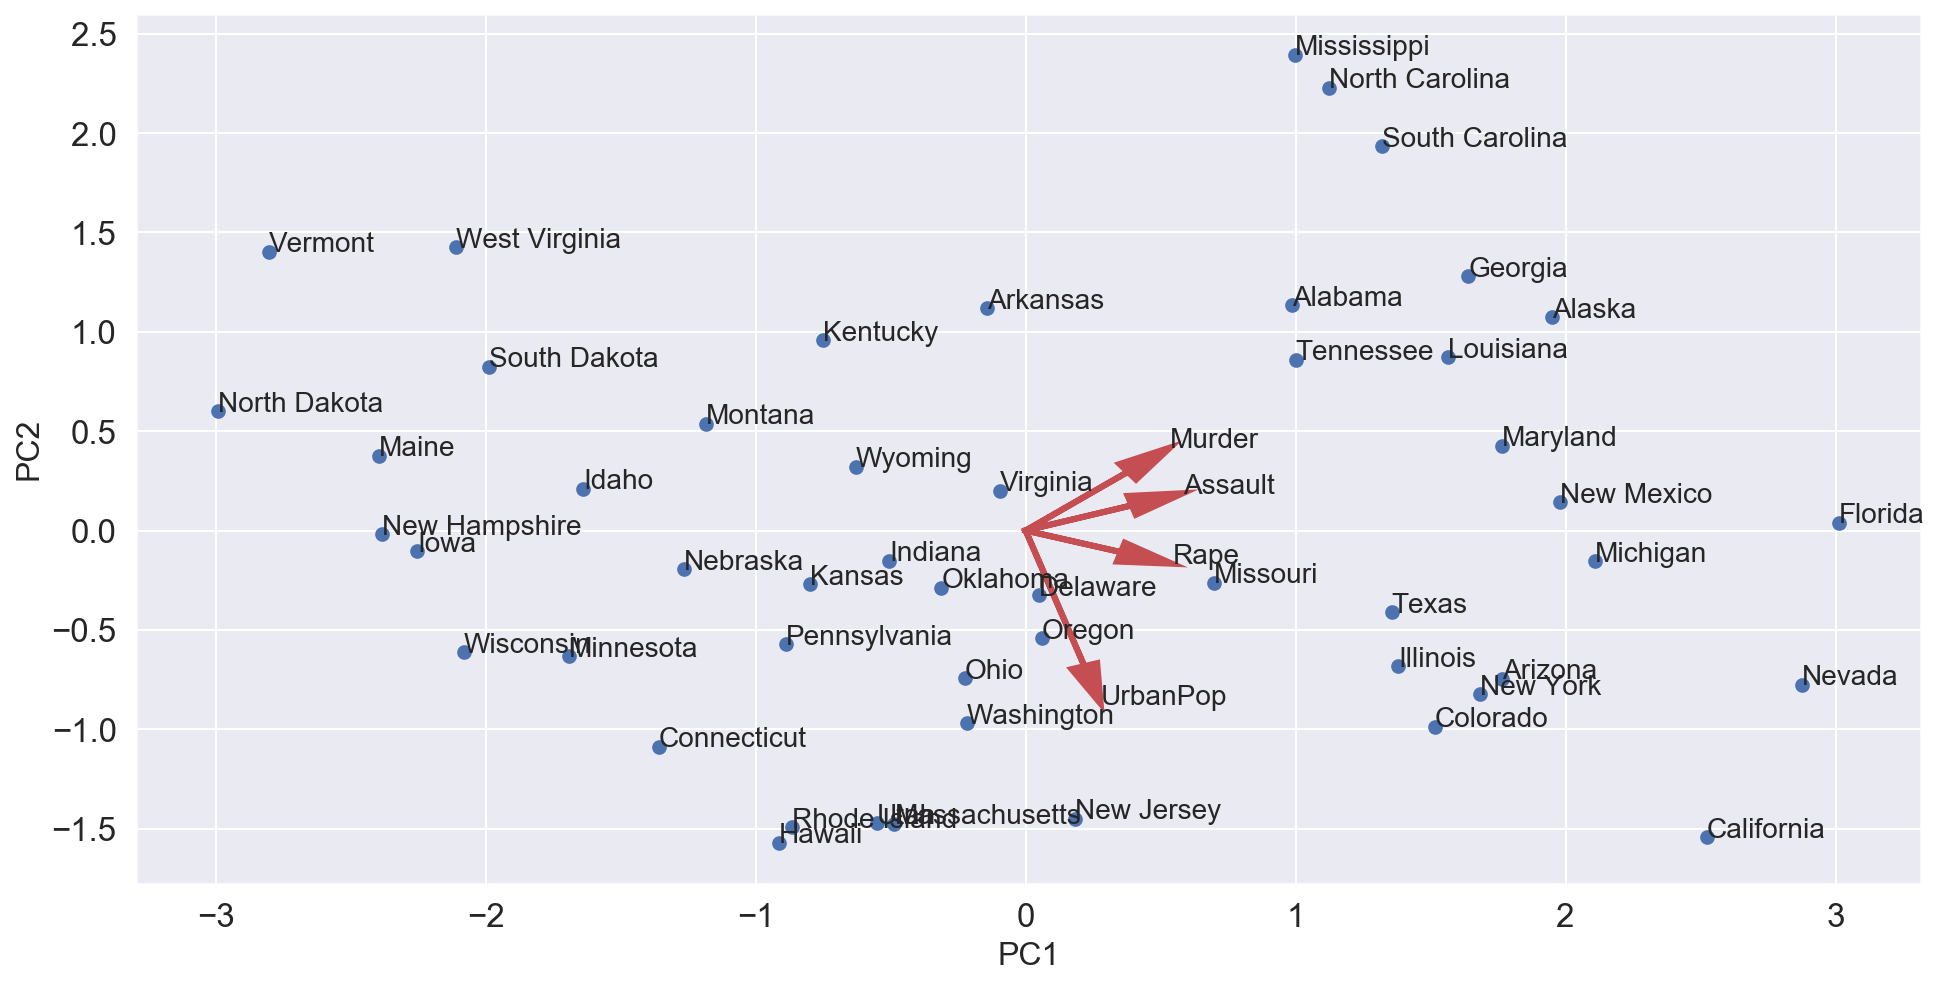

In [25]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(df_pca.PC1,
           df_pca.PC2,
           s=40,
           cmap=plt.cm.get_cmap('rainbow'))

hw = 0.1
hl = 0.2
for i in range(X.shape[1]):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
             fc='r', ec='r', head_width=hw, head_length=hl,
             length_includes_head=True, label='x', lw=3)
    ax.annotate(df.columns[1+i], (pca.components_[0, i],
                                  pca.components_[1, i]), fontsize=14)


for i, xi in enumerate(df_pca['States']):
    ax.annotate(xi, (df_pca.iloc[i, 0], df_pca.iloc[i, 1]), fontsize=14)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
plt.show()

In [26]:
from scikitplot.decomposition import plot_pca_component_variance, plot_pca_2d_projection

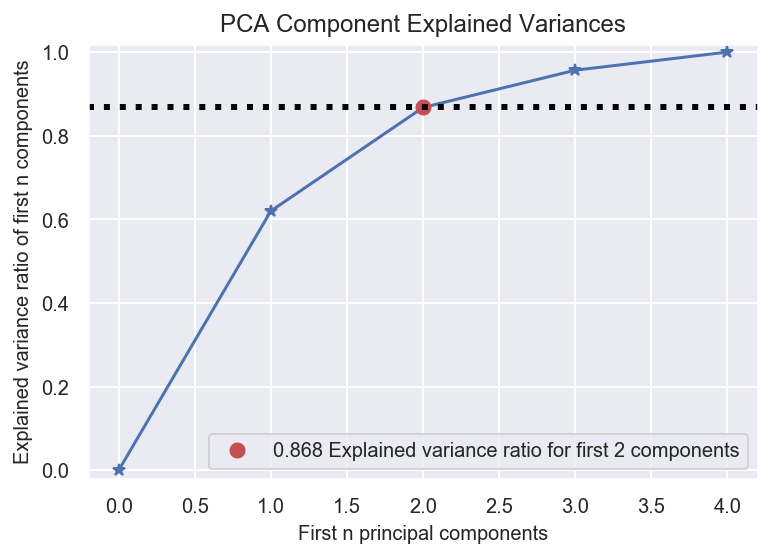

In [27]:
plot_pca_component_variance(pca, target_explained_variance=0.8)
plt.show()

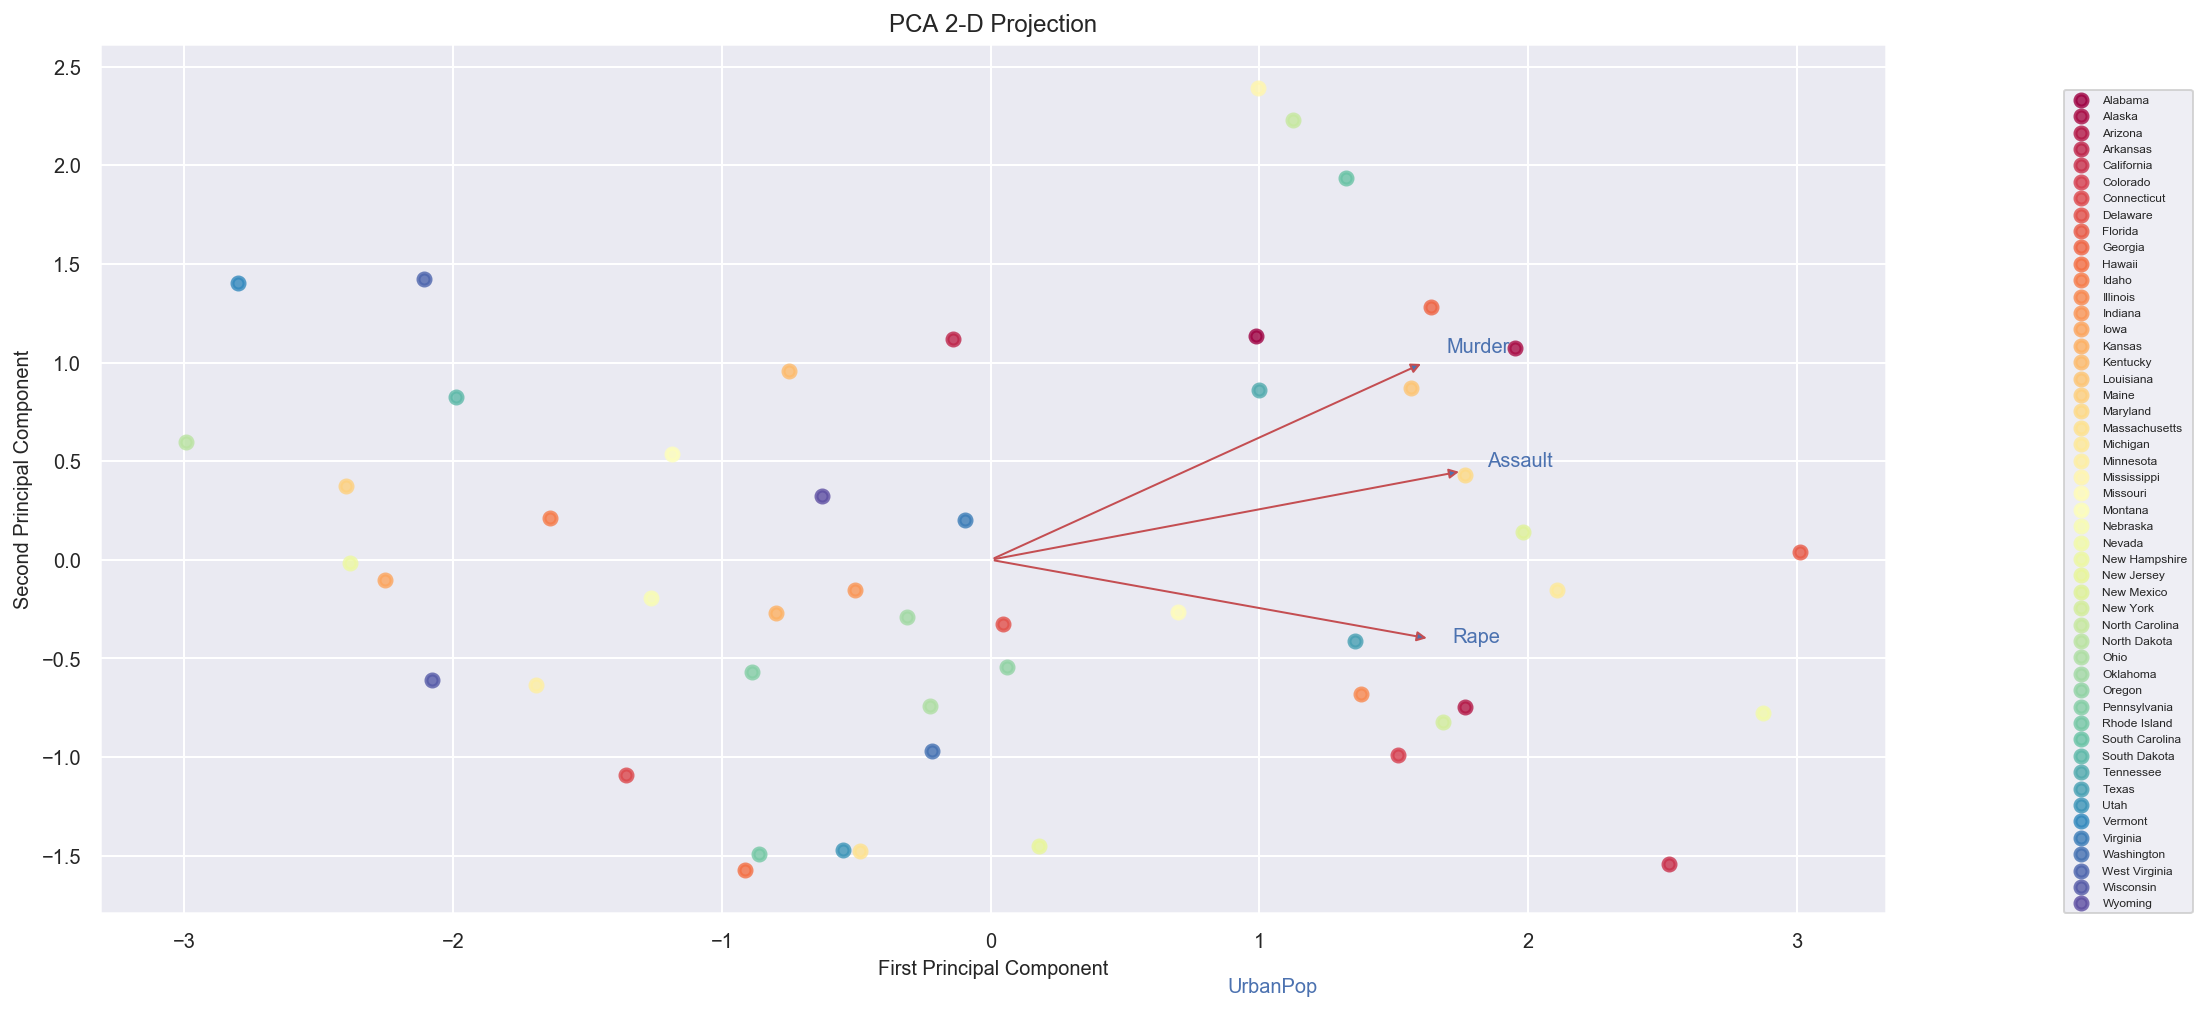

In [28]:
plot_pca_2d_projection(pca, X, df.States, biplot=True, feature_labels=list(df.columns[1:]), figsize=(16,8))
plt.legend(loc=[1.1, 0], fontsize=6)
plt.show()

#### 4. Perform hierarchical clustering on the rescaled dataset obtained in 2

- Calculate the cophenetic correlation and distances 
- Plot the resulting dendrogram
- Produce a scatter plot of the data using the cluster labels for coloring

In [29]:
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
print(c)

0.6975265632370389


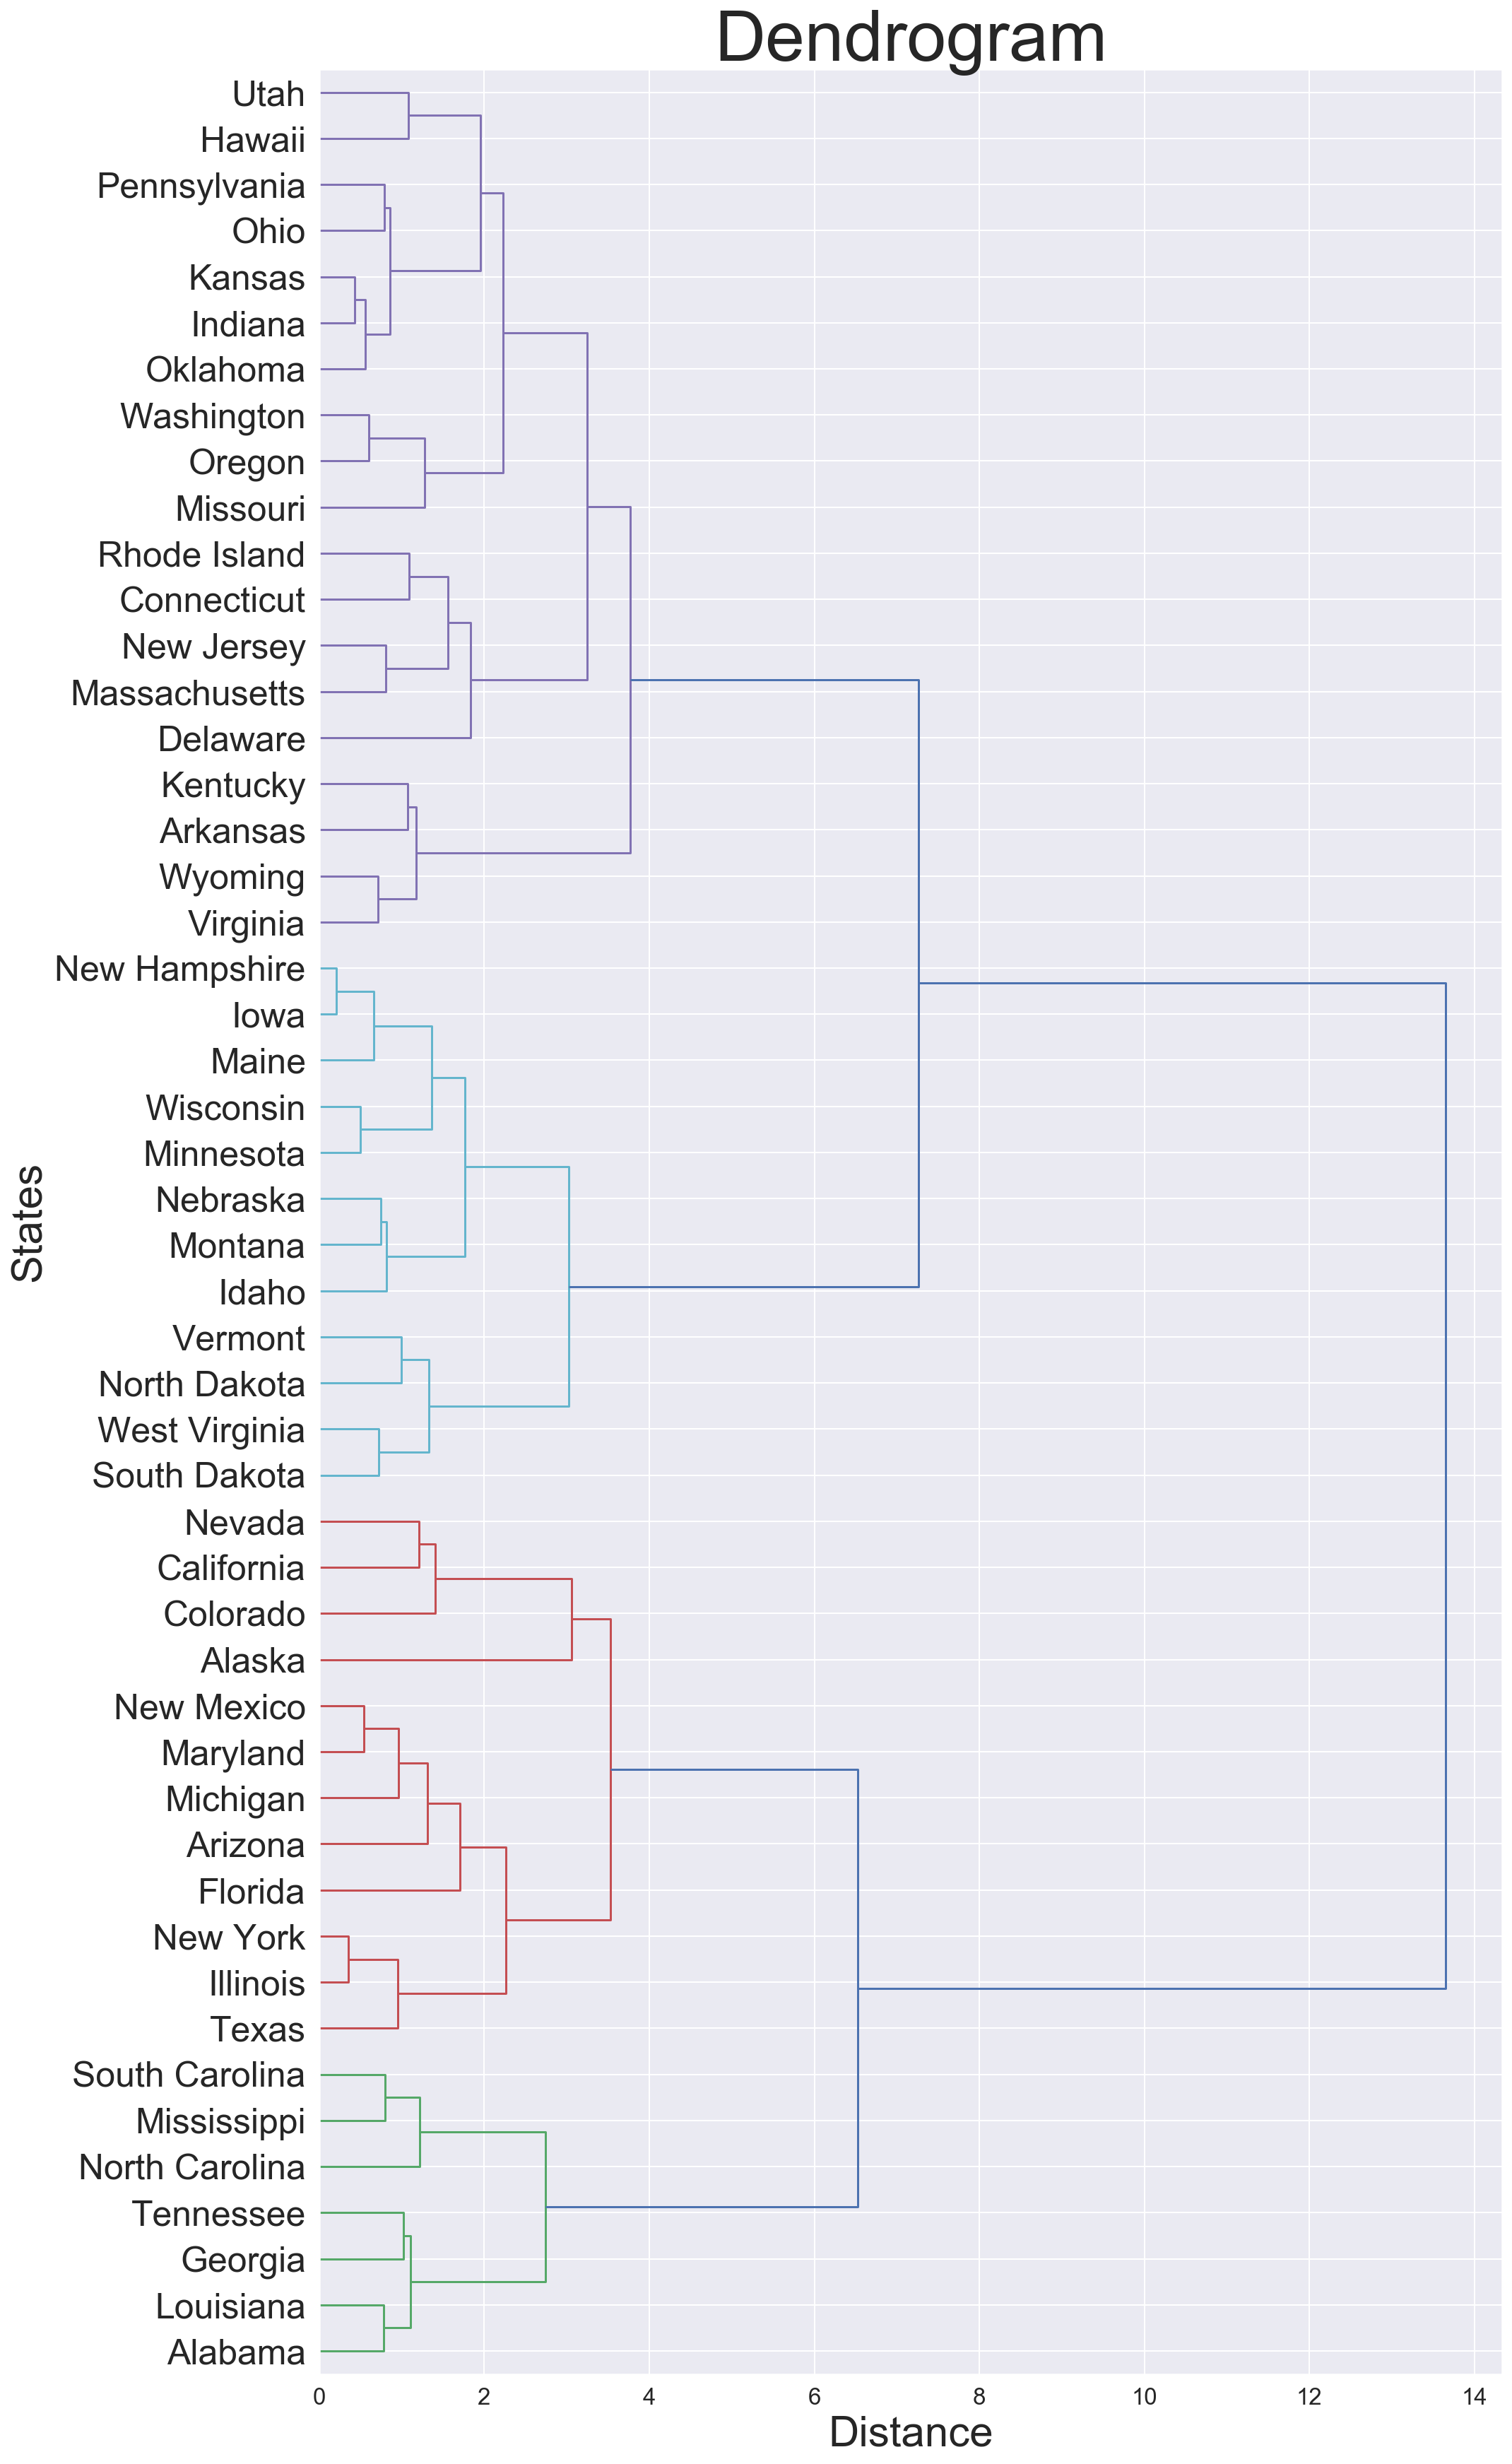

In [30]:
plt.figure(figsize=(15, 30))
plt.title('Dendrogram', fontsize=50)
plt.xlabel('Distance', fontsize=30)
plt.ylabel('States', fontsize=30)
dendrogram(
    Z,
    orientation='right',
    #     leaf_rotation=90.,
    leaf_font_size=18.,
    labels=df.States.values,
    color_threshold=6
)
plt.yticks(fontsize=25.)
plt.show()

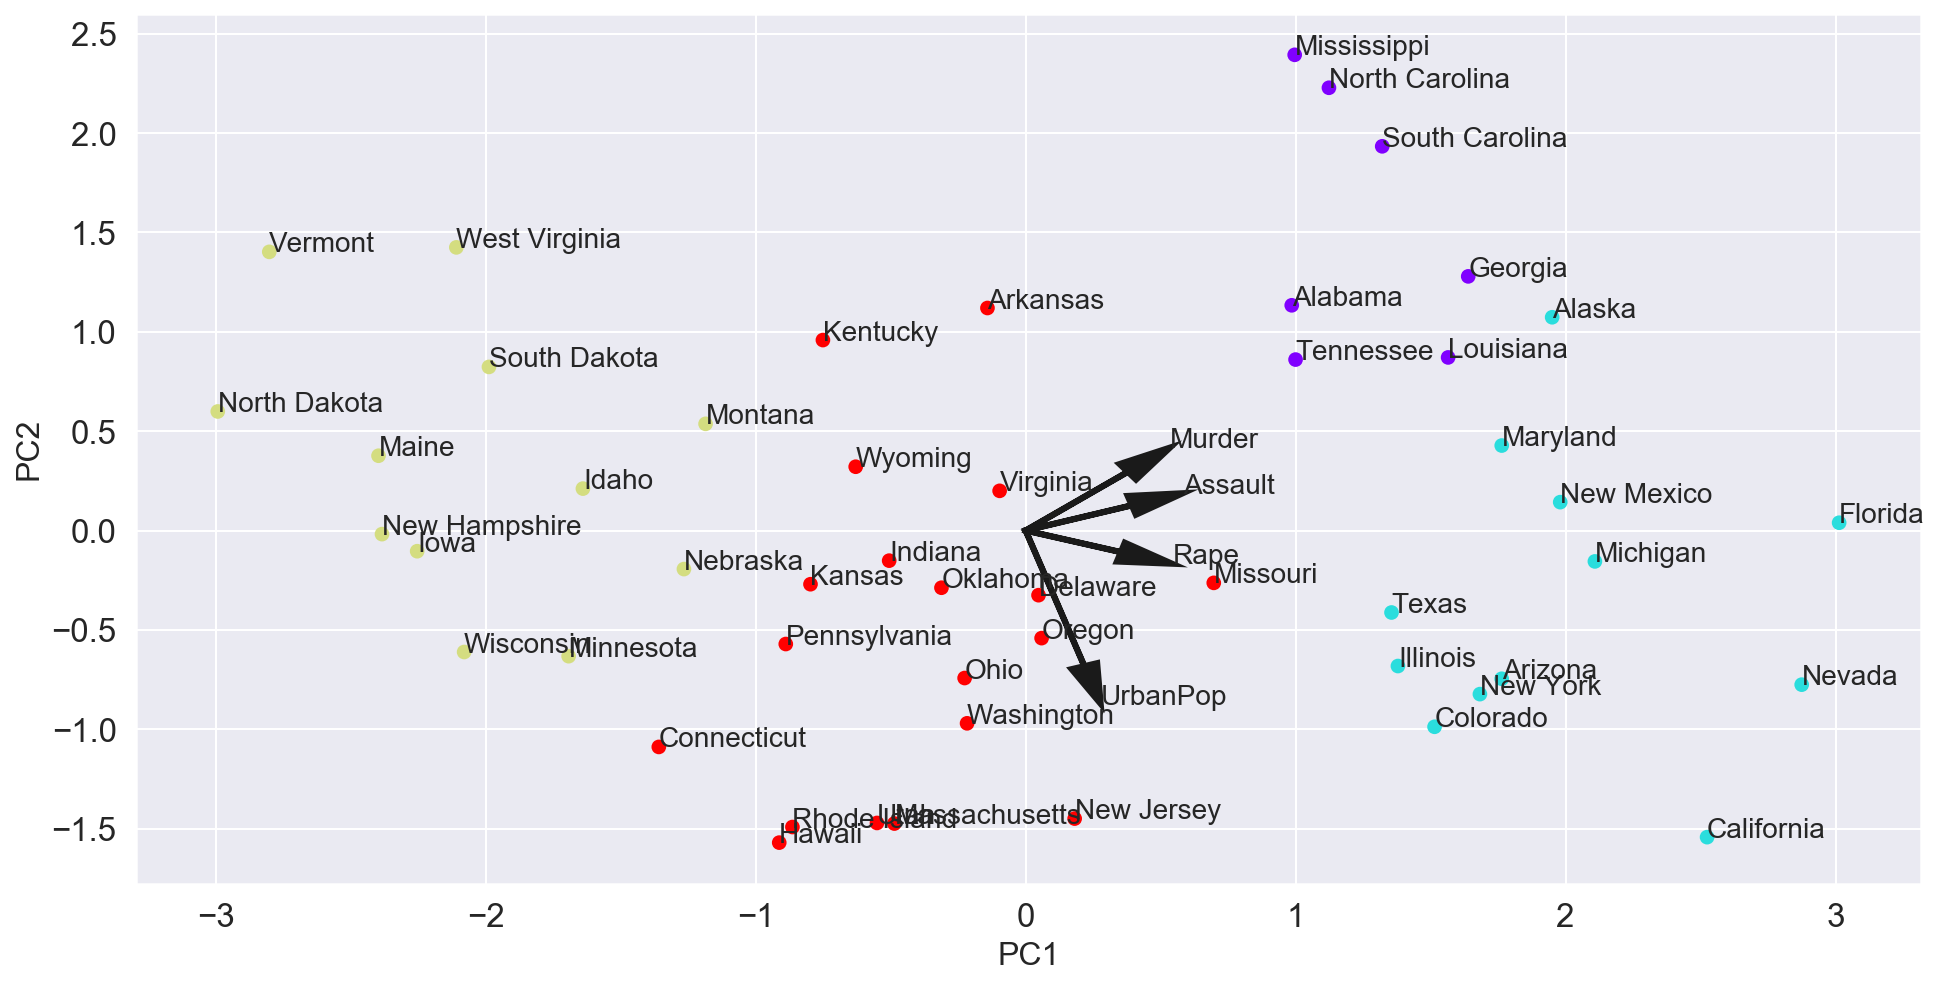

In [31]:
max_d = 4
clusters = fcluster(Z, max_d, criterion='distance')
# print(dict(zip(df.States,clusters)))

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df_pca.PC1,
           df_pca.PC2,
           c=clusters,
           s=40,
           cmap=plt.cm.get_cmap('rainbow'))

hw = 0.1
hl = 0.2
for i in range(X.shape[1]):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
             fc='k', ec='k', head_width=hw, head_length=hl,
             length_includes_head=True, label='x', lw=3)
    ax.annotate(df.columns[1+i], (pca.components_[0, i],
                                  pca.components_[1, i]), fontsize=14)


for i, xi in enumerate(df_pca['States']):
    ax.annotate(xi, (df_pca.iloc[i, 0], df_pca.iloc[i, 1]), fontsize=14)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
plt.show()

#### 5. Perform hierarchical clustering on the first two principal components obtained in 3

- Calculate the cophenetic correlation and distances 
- Plot the resulting dendrogram
- Do you observe any differences compared to clustering on all features done in 4?

In [47]:
X_temp = pd.DataFrame(X_pca)
X_temp.iloc[:, :2].head()

,0,1
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


In [48]:
Z = linkage(X_pca[:, :2], 'ward')
c, coph_dists = cophenet(Z, pdist(X_pca))
print(c)
print(coph_dists.mean())

0.6888221600493782
8.909460312092797


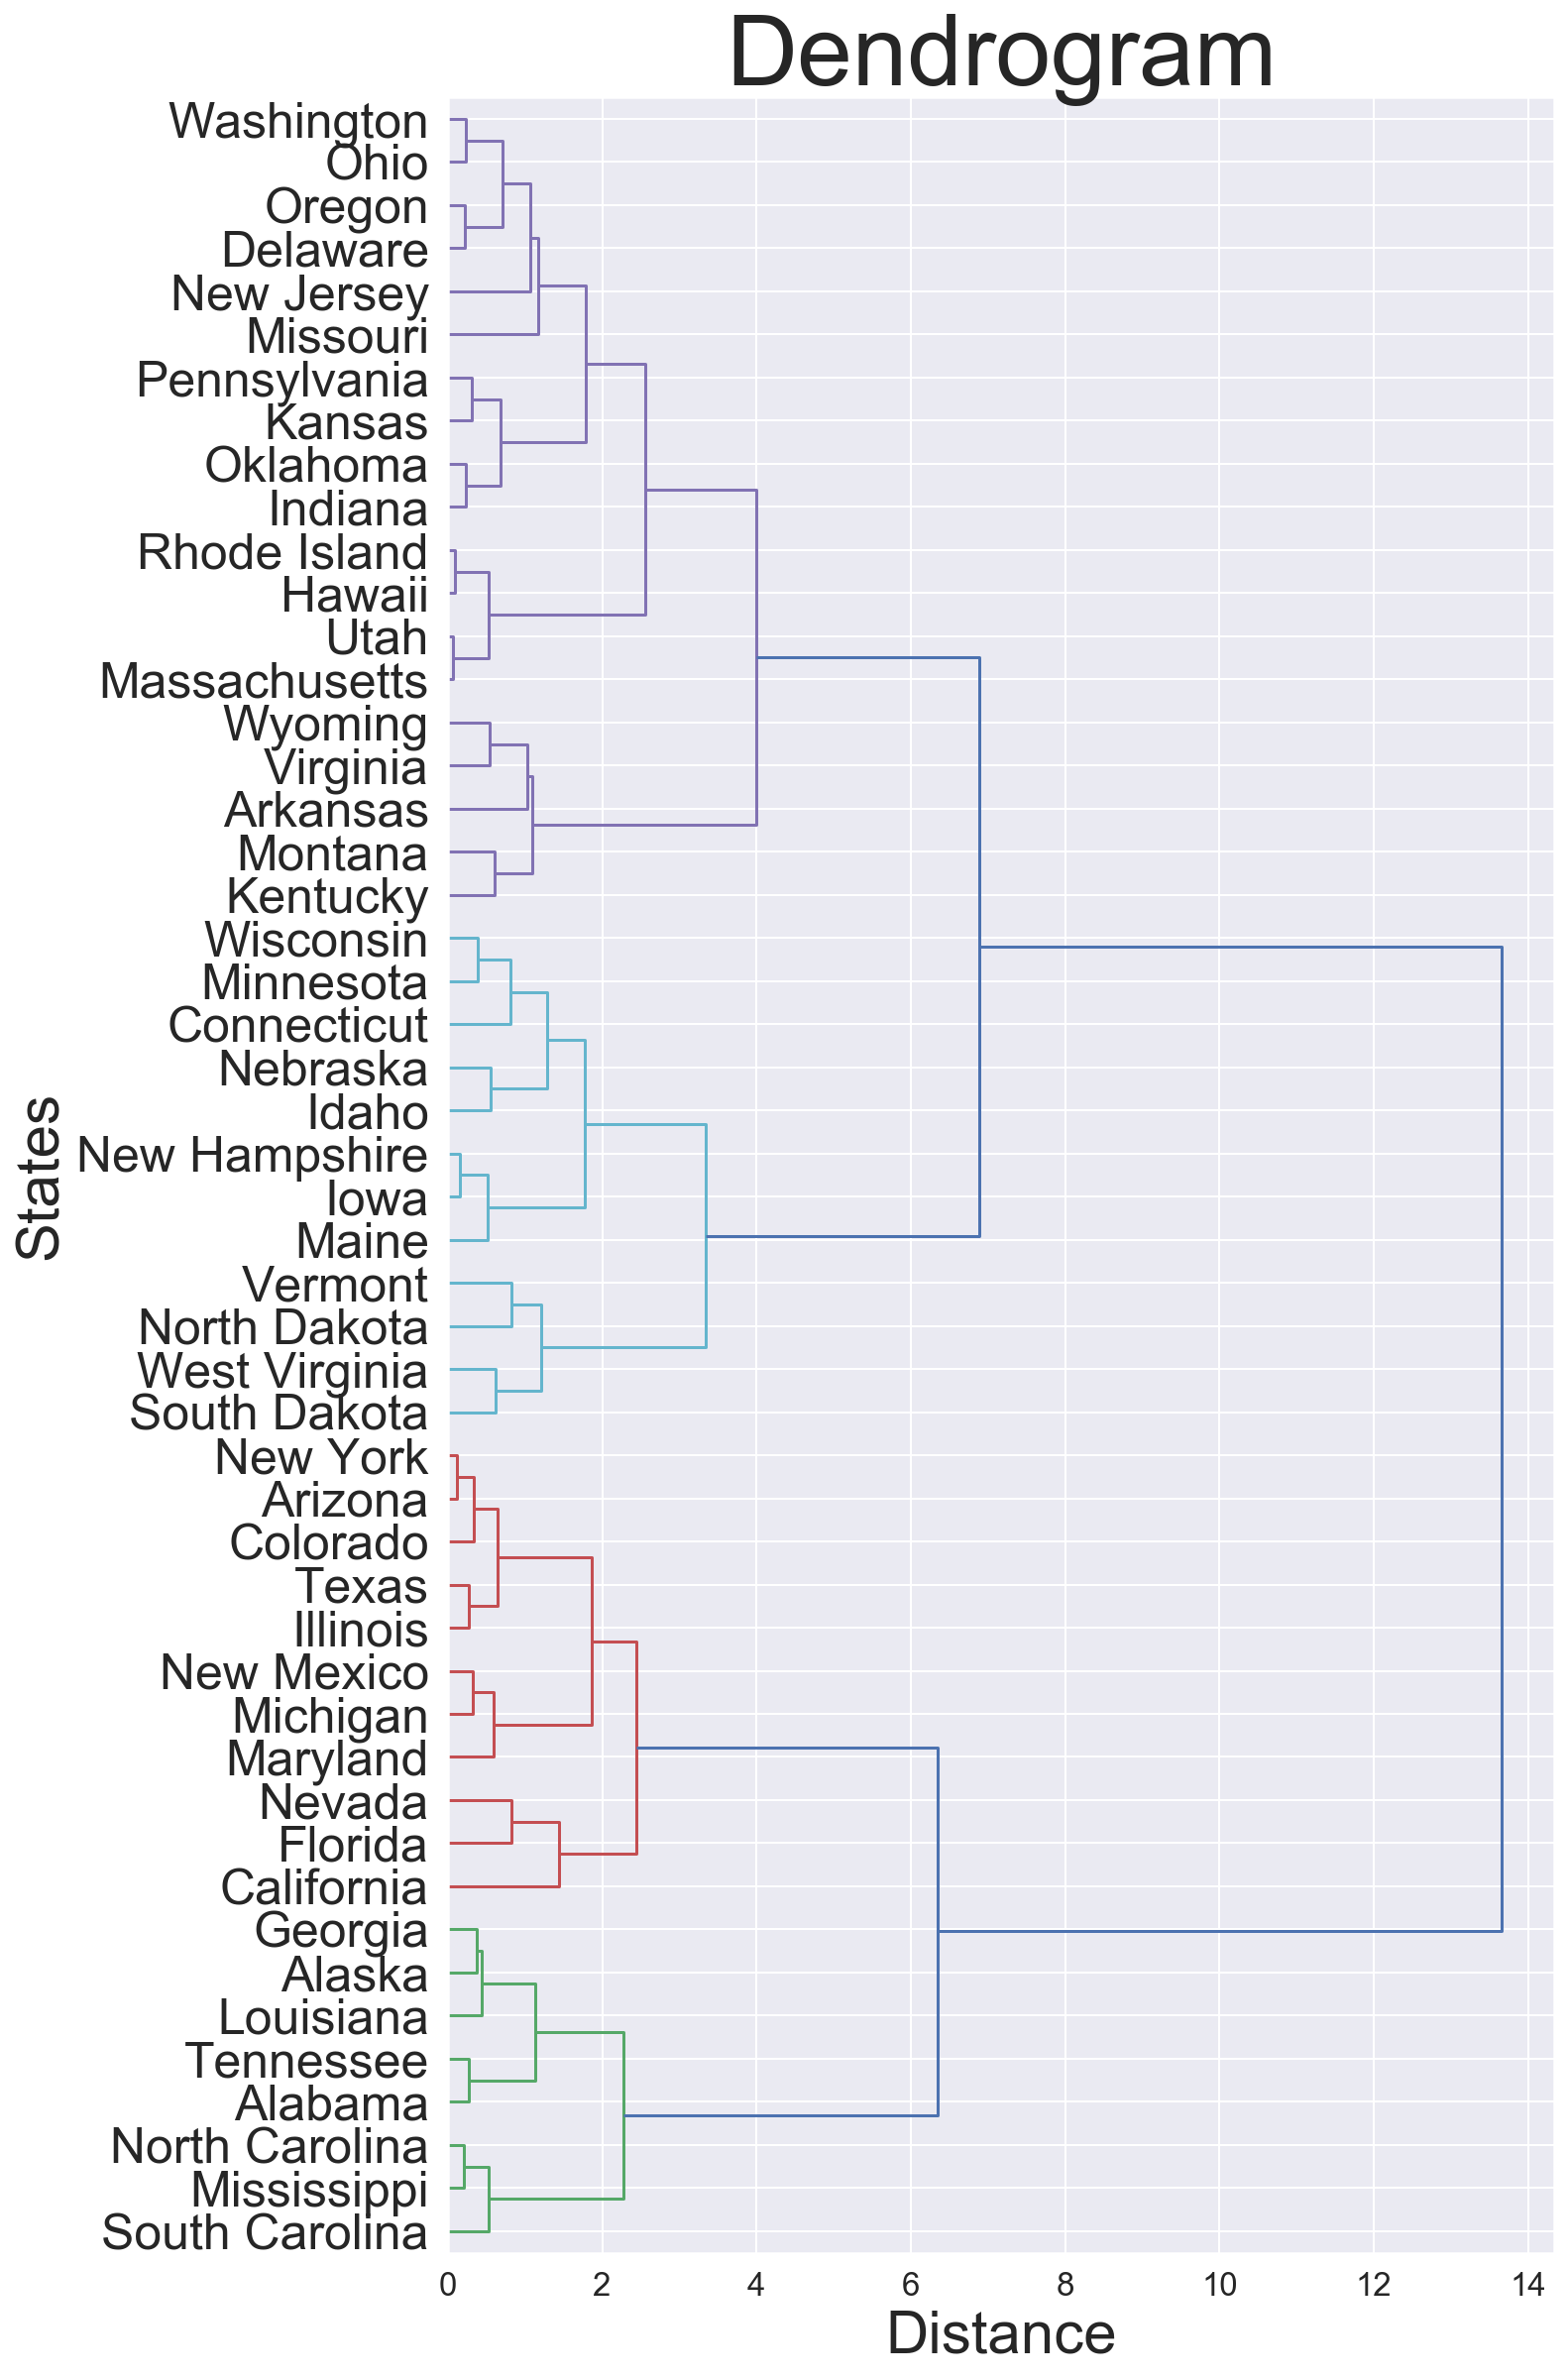

In [33]:
plt.figure(figsize=(10, 20))
plt.title('Dendrogram', fontsize=50)
plt.ylabel('States', fontsize=30)
plt.xlabel('Distance', fontsize=30)
dendrogram(
    Z,
    orientation='right',
    leaf_rotation=0.,
    leaf_font_size=18.,
    labels=[state[:] for state in df.States],
    color_threshold=4
)
plt.yticks(fontsize=25.)
plt.show()

#### 6. Now take the clustering from 5 and obtain cluster labels for the data points using the fcluster function. 

- Vary the threshold
- Produce a plot which shows the number of different clusters obtained versus the threshold value

In [34]:
cluster_num = []
for max_d in np.arange(0, 10, 0.1):
    clusters = fcluster(Z, max_d, criterion='distance')
    cluster_num.append((max_d, len(set(clusters))))

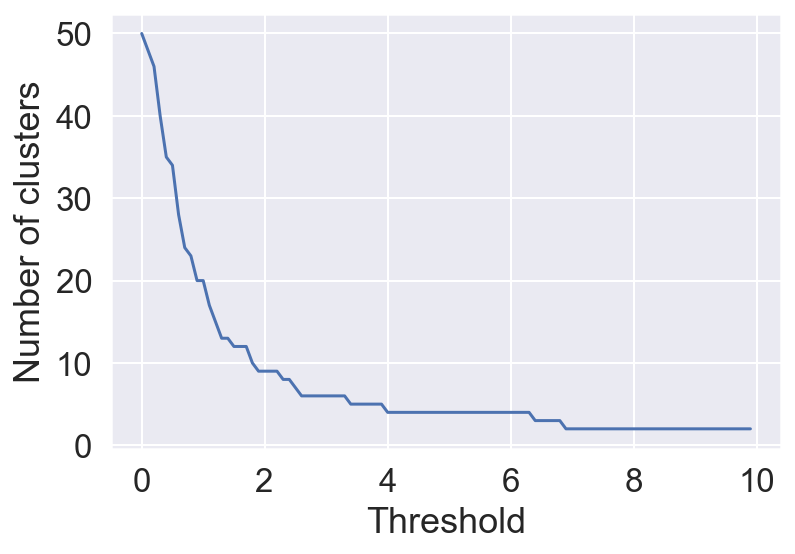

In [35]:
plt.plot(np.array(cluster_num)[:, 0], np.array(cluster_num)[:, 1])
plt.xlabel('Threshold')
plt.ylabel('Number of clusters')
plt.show()

#### 7. Continue with the results from 5 and 6. 

- Set your threshold so that 4 different clusters are obtained. 
- Produce a scatter plot of the data with the points colored according to their cluster label.

{1, 2, 3, 4}
{'Alabama': 1, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 4, 'California': 2, 'Colorado': 2, 'Connecticut': 3, 'Delaware': 4, 'Florida': 2, 'Georgia': 1, 'Hawaii': 4, 'Idaho': 3, 'Illinois': 2, 'Indiana': 4, 'Iowa': 3, 'Kansas': 4, 'Kentucky': 4, 'Louisiana': 1, 'Maine': 3, 'Maryland': 2, 'Massachusetts': 4, 'Michigan': 2, 'Minnesota': 3, 'Mississippi': 1, 'Missouri': 4, 'Montana': 4, 'Nebraska': 3, 'Nevada': 2, 'New Hampshire': 3, 'New Jersey': 4, 'New Mexico': 2, 'New York': 2, 'North Carolina': 1, 'North Dakota': 3, 'Ohio': 4, 'Oklahoma': 4, 'Oregon': 4, 'Pennsylvania': 4, 'Rhode Island': 4, 'South Carolina': 1, 'South Dakota': 3, 'Tennessee': 1, 'Texas': 2, 'Utah': 4, 'Vermont': 3, 'Virginia': 4, 'Washington': 4, 'West Virginia': 3, 'Wisconsin': 3, 'Wyoming': 4}


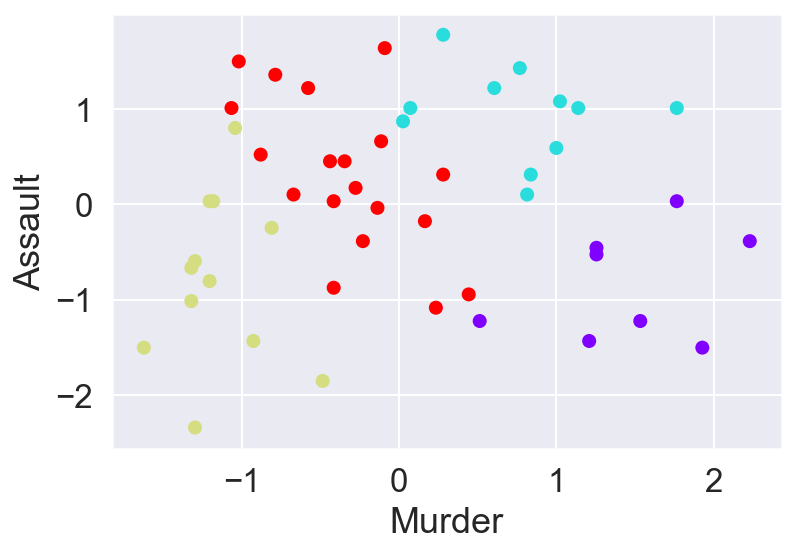

In [36]:
max_d = 4
clusters = fcluster(Z, max_d, criterion='distance')
print(set(clusters))
print(dict(zip(df.States, clusters)))

plt.scatter(X[:, 0], X[:, 2], c=clusters, cmap='rainbow')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.show()

#### Optional 1: Annotate the points in the scatter plot by the state names and identify the states belonging to the same cluster.

In [37]:
df_pca['Cluster'] = clusters
df_pca.head()

,PC1,PC2,PC3,PC4,States,Cluster
0,0.985566,1.133392,-0.444269,0.156267,Alabama,1
1,1.950138,1.073213,2.040003,-0.438583,Alaska,1
2,1.763164,-0.745957,0.054781,-0.834653,Arizona,2
3,-0.141420,1.119797,0.114574,-0.182811,Arkansas,4
4,2.523980,-1.542934,0.598557,-0.341996,California,2


In [38]:
df_pca[df_pca.States.str.contains('New')]

,PC1,PC2,PC3,PC4,States,Cluster
28,-2.383915,-0.018082,0.036855,-0.033137,New Hampshire,3
29,0.181566,-1.449506,-0.764454,0.243383,New Jersey,4
30,1.980024,0.142849,0.183692,-0.339534,New Mexico,2
31,1.682577,-0.823184,-0.643075,-0.013484,New York,2


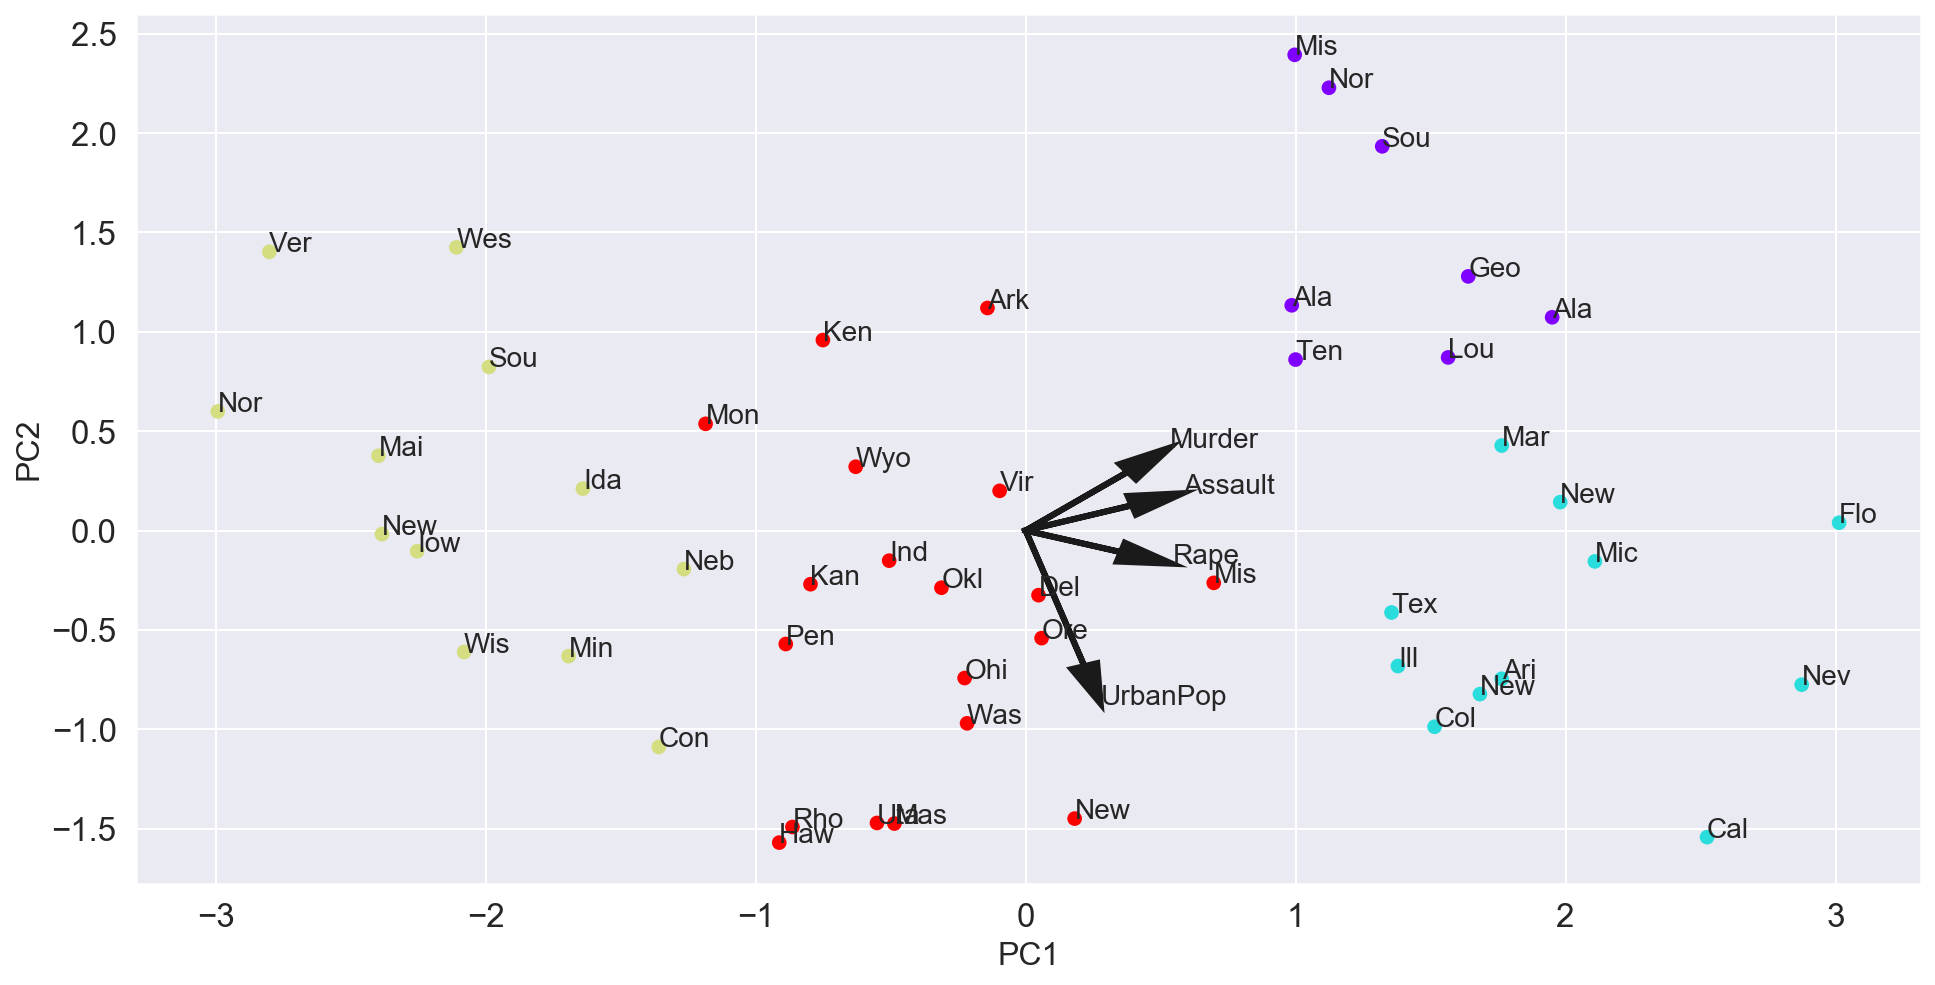

In [39]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df_pca.PC1,
           df_pca.PC2,
           s=40,
           c=clusters,
           cmap=plt.cm.get_cmap('rainbow'))

hw = 0.1
hl = 0.2
for i in range(X.shape[1]):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
             fc='k', ec='k', head_width=hw, head_length=hl,
             length_includes_head=True, label='x', lw=3)
    ax.annotate(df.columns[1+i], (pca.components_[0, i],
                                  pca.components_[1, i]), fontsize=14)


for i, xi in enumerate(df_pca['States']):
    ax.annotate(xi[:3], (df_pca.iloc[i, 0], df_pca.iloc[i, 1]), fontsize=14)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
plt.show()